In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('ml-zoomcamp-03-classification-homework')
jovian.set_colab_id('15_igwwbnGGbG4HWJ5gmCbTU-WbuiUeQi')

     |████████████████████████████████| 68 kB 3.6 MB/s 


# ml-zoomcamp-03-classification-homework

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="ml-zoomcamp-03-classification-homework")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pknayak0707-job/ml-zoomcamp-03-classification-homework


'https://jovian.ai/pknayak0707-job/ml-zoomcamp-03-classification-homework'

## Downlad the data:

In [5]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [6]:
!wget $data

--2022-09-25 18:34:56--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.03s   

2022-09-25 18:34:56 (43.0 MB/s) - ‘housing.csv’ saved [1423529/1423529]



## Package Imports

In [7]:
import pandas as pd
import numpy as np

## Data understanding:

In [8]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [10]:
# good way of vizualizing the dataframe.
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,near_bay,near_bay,near_bay,near_bay,near_bay


## Data preparation:

- Select only the features from above and fill in the missing values with 0.
- Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe.
- Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe.
- Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe.

In [11]:
req_cols = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 
            'total_bedrooms', 'population', 'households', 'median_income', 
            'median_house_value', 'ocean_proximity',]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
selected_col_df = df[req_cols]

In [14]:
selected_col_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
selected_col_df['total_bedrooms'] = selected_col_df.total_bedrooms.fillna(0)
selected_col_df.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [16]:
selected_col_df['rooms_per_household'] = selected_col_df['total_rooms'] / selected_col_df['households']
selected_col_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay,6.984127
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay,6.238137
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,8.288136
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,5.817352
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,6.281853


In [17]:
selected_col_df['bedrooms_per_room '] = selected_col_df['total_bedrooms'] / selected_col_df['total_rooms']
selected_col_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay,6.984127,0.146591
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay,6.238137,0.155797
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,8.288136,0.129516
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,5.817352,0.184458
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,6.281853,0.172096


In [18]:
selected_col_df['population_per_household'] = selected_col_df['population'] / selected_col_df['households']
selected_col_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,6.281853,0.172096,2.181467


In [19]:
selected_col_df['ocean_proximity'].mode()

0    <1h_ocean
dtype: object

## Split the data

In [20]:
# - Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
from sklearn.model_selection import train_test_split

In [21]:
# - Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_train_full, df_test = train_test_split(selected_col_df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.2, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [22]:
# - Make sure that the target value (`median_house_value`) is not in your dataframe.
'median_house_value' in df_train.columns or \
'median_house_value' in df_val.columns or \
'median_house_value' in df_test.columns

False

## Question 2

- Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?

In [23]:
selected_col_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  20640 non-null  float64
 1   longitude                 20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [24]:
# what is the best way to divide columns into categorical and numerical values
categorical_columns = list(selected_col_df.dtypes[selected_col_df.dtypes == 'object'].index)
numerical_columns = [cols for cols in selected_col_df.columns if cols not in categorical_columns] 

In [25]:
categorical_columns, len(categorical_columns), numerical_columns, len(numerical_columns) 

(['ocean_proximity'],
 1,
 ['latitude',
  'longitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'median_house_value',
  'rooms_per_household',
  'bedrooms_per_room ',
  'population_per_household'],
 12)

In [26]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

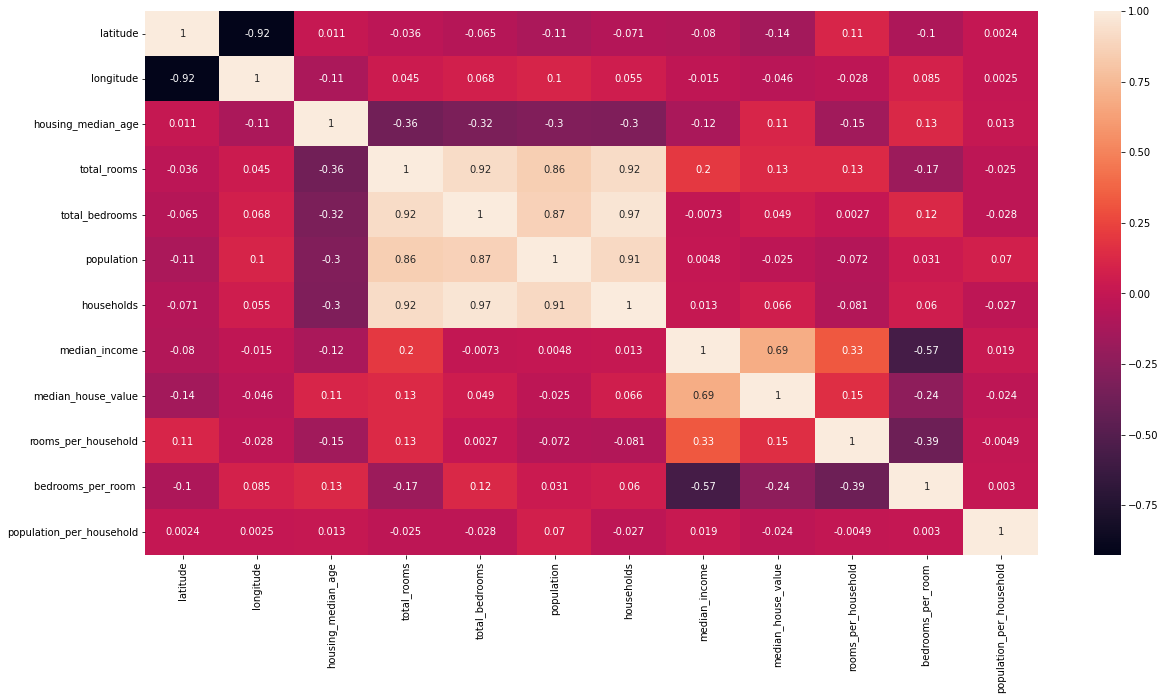

In [27]:
plt.figure(figsize=(20, 10))
corrMatrix = selected_col_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Make `median_house_value` binary

- We need to turn the `median_house_value` variable from numeric into binary.
- Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

In [28]:
mean_value = selected_col_df['median_house_value'].mean()
mean_value

206855.81690891474

In [29]:
rough = selected_col_df['median_house_value'].apply(lambda x: 1 if x>mean_value else 0)

In [30]:
selected_col_df['median_house_value'][:3], rough[:3]

(0    452600.0
 1    358500.0
 2    352100.0
 Name: median_house_value, dtype: float64, 0    1
 1    1
 2    1
 Name: median_house_value, dtype: int64)

In [31]:
selected_col_df['above_average'] = selected_col_df['median_house_value'].apply(lambda x: 1 if x>mean_value else 0)

### Question 3

- Calculate the mutual information score with the (binarized) price
for the categorical variable that we have. Use the training set only.
- What is the value of mutual information?
- Round it to 2 decimal digits using `round(score, 2)`

Options:

- 0.26
- 0
- 0.10
- 0.16

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
df_train_full, df_test = train_test_split(selected_col_df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.2, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [ ]:
# - Make sure that the target value (`median_house_value`) is not in your dataframe.
'median_house_value' in df_train.columns or \
'median_house_value' in df_val.columns or \
'median_house_value' in df_test.columns

False

In [ ]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.above_average)

df_mi = df_train_full[categorical_columns].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [ ]:
df_mi.head()

,MI
ocean_proximity,0.101922


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Resources used as reference:

* [03-classfication-one-hot-encoding](https://github.com/MekongDelta-mind/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/notebook-scaling-ohe.ipynb)

* [03.Machine Learning for Classification](https://github.com/MekongDelta-mind/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/notebook.ipynb)

* [ML_Zoomcamp-old-nb-03-churn-predition](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-03-churn-prediction/03-churn.ipynb)
* [Mutual Information - kaggle](https://www.kaggle.com/code/ryanholbrook/mutual-information)

* How to use Kaggle for your Data Science Journey:
  1. take the topic name
  1. search site wise results in Kaggle, let's say you are searching for mutual information topic in kaggle:
    1. `site:kaggle.com mutual information`
    1. mostly the first link that comes in the google list, is the most appropriate and easy to understand article you need to get a hold of the topic (because millions if not billions try to google same term and the articles are sorted by google as per most frequenlty visited sites ).
      1. This somewhat similar to using the power of community and reaching your goal in the least time.

In [33]:
# Execute this to save new versions of the notebook
jovian.commit(project="ml-zoomcamp-03-classification-homework")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pknayak0707-job/ml-zoomcamp-03-classification-homework


'https://jovian.ai/pknayak0707-job/ml-zoomcamp-03-classification-homework'